# Sloan Digital Sky Survey

#### I was looking for an unused and interesting dataset to improve my data science skills on when my professor mentioned the Sloan Digital Sky Survey which offers public data of space observations. As I found the data to be super insightful I want to share the data.

# Content

#### The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

# Importing Required Libraries and Reading Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [3]:
df = pd.read_csv('Skyserver_DR16.csv')

In [4]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


# Exploratory Data Analysis

In [5]:
df.shape

(100000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
objid        100000 non-null int64
ra           100000 non-null float64
dec          100000 non-null float64
u            100000 non-null float64
g            100000 non-null float64
r            100000 non-null float64
i            100000 non-null float64
z            100000 non-null float64
run          100000 non-null int64
rerun        100000 non-null int64
camcol       100000 non-null int64
field        100000 non-null int64
specobjid    100000 non-null uint64
class        100000 non-null object
redshift     100000 non-null float64
plate        100000 non-null int64
mjd          100000 non-null int64
fiberid      100000 non-null int64
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237663e+18,177.512888,25.052056,18.637915,17.407128,16.881676,16.625534,16.467087,3978.727640,301.0,3.274010,187.243080,2.913905e+18,0.170621,2587.984270,53913.908690,341.699080
std,7.264931e+12,78.039070,20.567259,0.832284,0.985921,1.133337,1.209532,1.281788,1691.498597,0.0,1.621208,141.037298,2.488872e+18,0.437571,2210.547391,1547.244489,217.068614
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004136,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.356526,6.770380,18.212902,16.852982,16.196608,15.865275,15.619960,2826.000000,301.0,2.000000,85.000000,1.335426e+18,0.000001,1186.000000,52733.000000,160.000000
50%,1.237662e+18,180.411688,23.918611,18.873250,17.515860,16.890640,16.599885,16.428385,3900.000000,301.0,3.000000,153.000000,2.354330e+18,0.045997,2091.000000,53726.000000,328.000000
75%,1.237667e+18,224.369107,40.344539,19.273302,18.056060,17.585750,17.344912,17.234625,5061.000000,301.0,5.000000,249.000000,3.276384e+18,0.095429,2910.000000,54585.000000,502.000000
max,1.237681e+18,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,8162.000000,301.0,6.000000,982.000000,1.317645e+19,7.011245,11703.000000,58543.000000,1000.000000


In [8]:
df['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

There is no compelling reason to have a deep understanding of stars, system or quasars - yet we would already be able to advise which features are probably not going to be identified with the target variable 'class'. 

objid and specobjid are only identifiers for getting to the rows back when they were put away in the original databank. Along these lines we won't need them for classification as they are not identified with the result. 

Significantly more: The features 'run', 'rerun', 'camcol' and 'field' are values which describe portions of the camera right when mentioning the objective fact, for example 'run' speaks to the comparing check which caught the oject.

We'll drop these features.

In [9]:
df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
df.head(3)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165,2861,54583


In [10]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

# Data Visualization

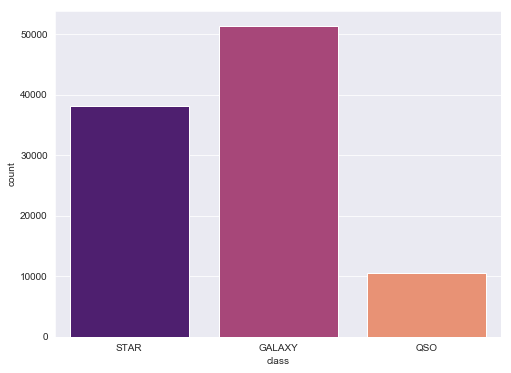

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'magma')

Using Boxplot to get a picture about outliers

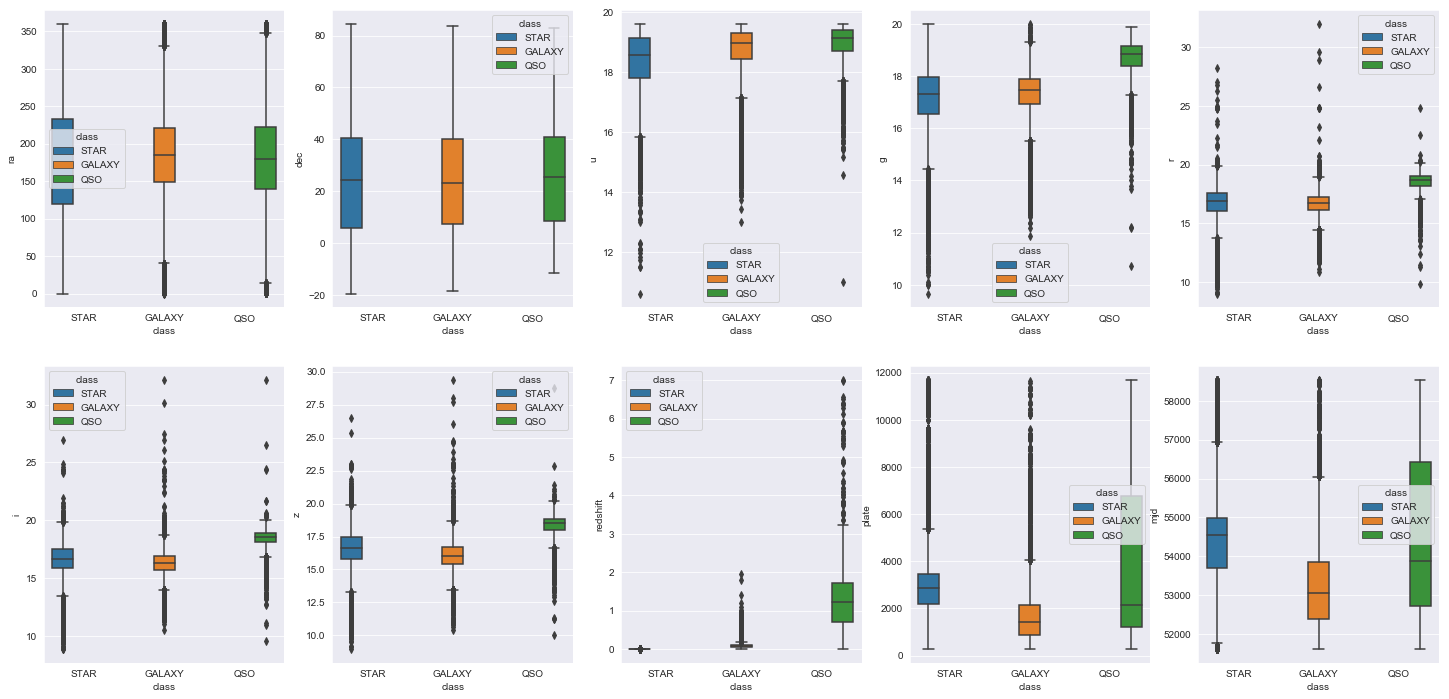

In [12]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = df)
sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = df)
sns.boxplot(ax=ax3, x = 'class', y = 'u', hue = 'class', data = df)
sns.boxplot(ax=ax4, x = 'class', y = 'g', hue = 'class', data = df)
sns.boxplot(ax=ax5, x = 'class', y = 'r', hue = 'class', data = df)
sns.boxplot(ax=ax6, x = 'class', y = 'i', hue = 'class', data = df)
sns.boxplot(ax=ax7, x = 'class', y = 'z', hue = 'class', data = df)
sns.boxplot(ax=ax8, x = 'class', y = 'redshift', hue = 'class', data = df)
sns.boxplot(ax=ax9, x = 'class', y = 'plate', hue = 'class', data = df)
sns.boxplot(ax=ax10, x = 'class', y = 'mjd', hue = 'class', data = df)

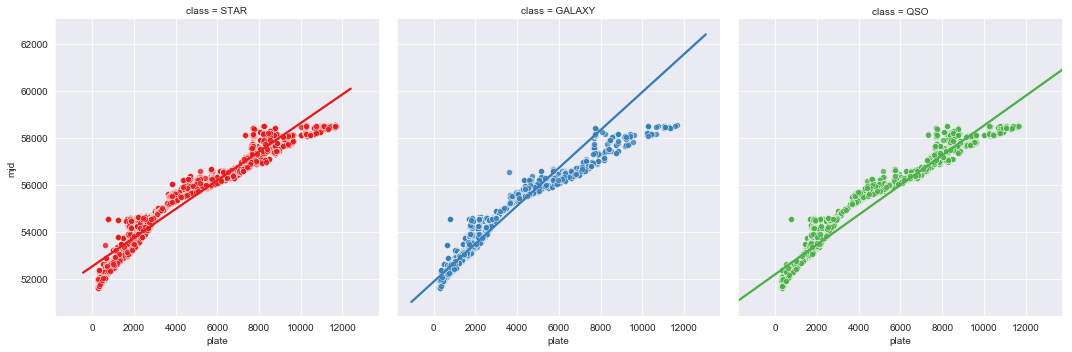

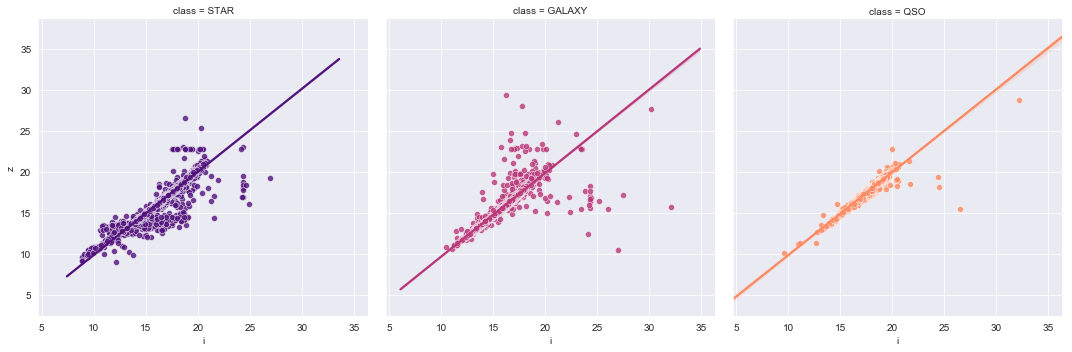

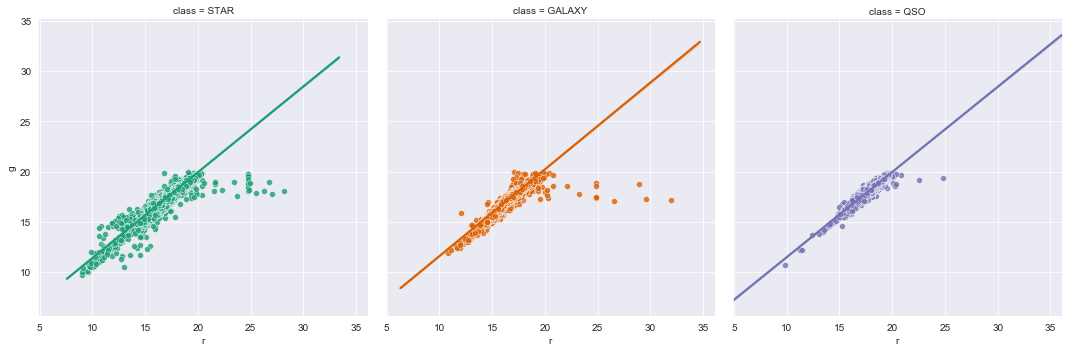

In [13]:
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'i', y='z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'r', y='g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

The redshift can be an estimate(!) for the distance from the earth to a object in space.

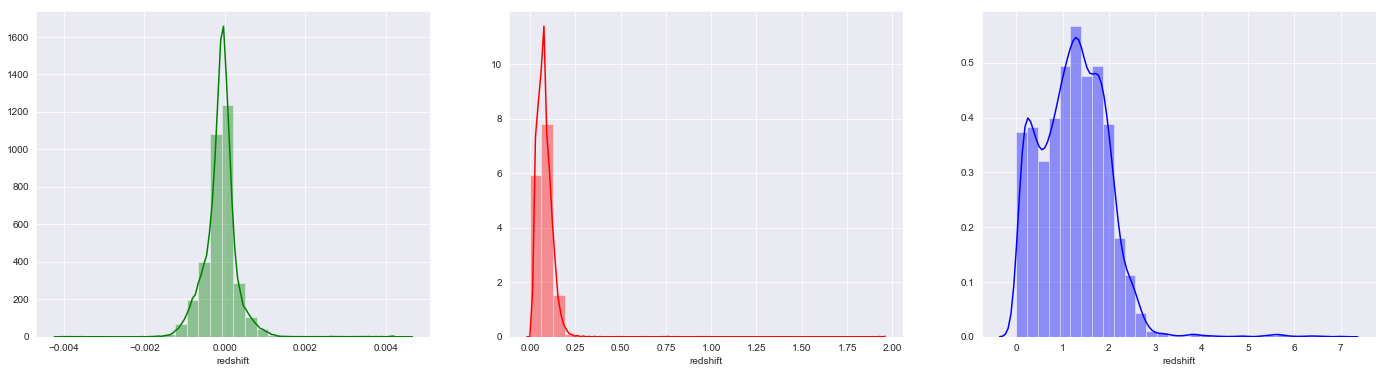

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].redshift, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].redshift, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].redshift, ax = ax3, bins = 30, color = 'b')

In [15]:
df.var()

ra          6.090096e+03
dec         4.230121e+02
u           6.926959e-01
g           9.720404e-01
r           1.284453e+00
i           1.462968e+00
z           1.642981e+00
redshift    1.914680e-01
plate       4.886520e+06
mjd         2.393966e+06
dtype: float64

Correlation using heatmap

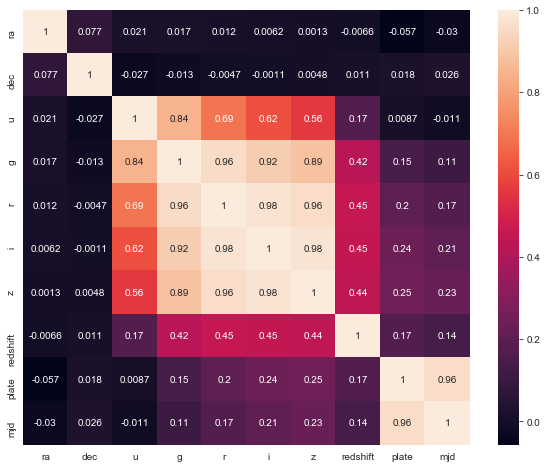

In [16]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

# Feature Engineering

Encoding Class labels to integers

In [17]:
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,1,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,1,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,1,0.000165,2861,54583
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,2,0.058155,2002,53471
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,2,0.072210,2123,53793


Dimension Reduction using PCA

As we saw in heatmap of correlation that features u, g, r, i, z are highly correlating so we will use PCA on them and reduce 5 features to 3 features for better accuracy.

In [18]:
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(df[['u', 'g', 'r', 'i', 'z']])

df = pd.concat((df, pd.DataFrame(df_pca)), axis = 1)
df.rename({0:'F1', 1:'F2', 2:'F3'}, axis = 1, inplace = True)
df.drop(['u', 'g', 'r', 'i', 'z'], axis = 1, inplace = True)
df.head(3)

,ra,dec,class,redshift,plate,mjd,F1,F2,F3
0,47.372545,0.820621,1,0.000115,7255,56597,0.547479,-0.147949,-0.116287
1,116.303083,42.455980,1,-0.000093,8290,57364,-0.926386,0.698880,-0.276002
2,172.756623,-8.785698,1,0.000165,2861,54583,2.837427,1.962139,-0.223020


Data separation into features and labels

In [19]:
X = df.drop('class', axis = 1).values
y = df['class'].values

Splitting data into train and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Because of presence of outliers we will be using RobustScaler to perform scaling on the data. For more about it look here:
https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [21]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

# Time to Train

Logistic Regression 

In [22]:
lr = LogisticRegression(max_iter=120)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n ', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
                precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.98      0.98      0.98     15366
           3       0.98      0.91      0.95      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.96      0.97     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix: 
 [[11456     0     7]
 [  254 15070    42]
 [    5   278  2888]]
Training Score:  0.9814571428571428
Testing Score:  0.9804666666666667


Support Vector Classification

In [23]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.98     15366
           3       0.99      0.94      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix: 
 [[11450    13     0]
 [  264 15058    44]
 [    5   178  2988]]
Training Score:  0.9845714285714285
Testing Score:  0.9832


Decision Tree Classifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train)
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     11463
           2       0.99      0.99      0.99     15366
           3       0.95      0.95      0.95      3171

    accuracy                           0.99     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000

Confusion Matrix: 
 [[11442    20     1]
 [   14 15201   151]
 [    5   146  3020]]
Training Score:  1.0
Testing Score:  0.9887666666666667


Ensemble Methods

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     11463
           2       0.99      0.99      0.99     15366
           3       0.98      0.96      0.97      3171

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.99     30000
weighted avg       0.99      0.99      0.99     30000

Confusion Matrix: 
 [[11452    10     1]
 [   25 15285    56]
 [    5   127  3039]]
Training Score:  0.9999857142857143
Testing Score:  0.9925333333333334


In [ ]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(rf, 'sdss.joblib') 
